In [423]:
import pygad
import random
import time

In [424]:
solved_sudoku =   [[4, 6, 9, 3, 8, 2, 1, 5, 7],
                   [2, 8, 1, 4, 7, 5, 3, 9, 6],
                   [7, 3, 5, 9, 1, 6, 2, 8, 4],
                   [5, 1, 3, 8, 9, 4, 6, 7, 2],
                   [6, 9, 4, 5, 2, 7, 8, 3, 1],
                   [8, 7, 2, 1, 6, 3, 5, 4, 9],
                   [1, 5, 8, 2, 4, 9, 7, 6, 3],
                   [9, 2, 6, 7, 3, 8, 4, 1, 5],
                   [3, 4, 7, 6, 5, 1, 9, 2, 8]]


def generate_sudoku(solved, gaps):
    sudoku = [[0 for i in range(9)] for j in range(9)]
    for i in range(9):
        for j in range(9):
            sudoku[i][j] = solved[i][j]

    while gaps > 0:
        i = random.randint(0, 8)
        j = random.randint(0, 8)
        if sudoku[i][j] != 0:
            sudoku[i][j] = 0
            gaps -= 1

    return sudoku

selected_sudoku = generate_sudoku(solved_sudoku, 40)
for i in selected_sudoku:
    print(i)

[0, 0, 9, 3, 0, 2, 0, 5, 7]
[2, 8, 1, 4, 0, 5, 0, 9, 6]
[7, 3, 0, 9, 1, 6, 0, 0, 0]
[5, 0, 0, 0, 9, 0, 0, 0, 2]
[6, 0, 0, 0, 2, 0, 8, 0, 1]
[8, 0, 0, 1, 6, 0, 5, 0, 9]
[0, 0, 8, 0, 0, 9, 0, 0, 0]
[9, 2, 6, 7, 0, 0, 0, 1, 0]
[0, 4, 7, 0, 0, 0, 9, 2, 8]


In [425]:
def empty_board():
    return [[0 for i in range(9)] for j in range(9)]


def check_row(board, row):
    return len(set(board[row]))


def check_col(board, col):
    column = [board[i][col] for i in range(9)]
    return len(set(column))


def check_box(board, row, col):
    box = [board[i][j] for i in range(row, row+3) for j in range(col, col+3)]
    return len(set(box))


def fill_in(solution):
    filled_sudoku = empty_board()
    sol_index = 0
    for i in range(9):
        for j in range(9):
            if selected_sudoku[i][j] != 0:
                filled_sudoku[i][j] = int(selected_sudoku[i][j])
            else:
                filled_sudoku[i][j] = int(solution[sol_index])
                sol_index += 1
    return filled_sudoku
    

In [426]:
#definiujemy parametry chromosomu
gene_space = [1, 2, 3, 4, 5, 6, 7, 8, 9] 

In [427]:
def fitness_func(solution, solution_idx):
    filled_sudoku = fill_in(solution)
    fitness = 0
    for i in range(9):
        fitness += check_row(filled_sudoku, i)
        fitness += check_col(filled_sudoku, i)
    for i in range(0, 9, 3):
        for j in range(0, 9, 3):
            fitness += check_box(filled_sudoku, i, j)
    return fitness

fitness_function = fitness_func

In [428]:
def genes_number(sudoku):
    genes = 0
    for i in range(9):
        for j in range(9):
            if sudoku[i][j] == 0:
                genes += 1
    return genes

In [429]:
#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 400
num_genes = genes_number(selected_sudoku)

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = sol_per_pop // 2
num_generations = 5000
keep_parents = sol_per_pop // 13

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 2

In [430]:
#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_function,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    parent_selection_type=parent_selection_type,
                    keep_parents=keep_parents,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes,
                    stop_criteria=["reach_243", "saturate_200"]
                    )

#uruchomienie algorytmu
start = time.time()
ga_instance.run()
end = time.time()
time_passed = end - start

Parameters of the best solution: [4. 6. 8. 1. 7. 3. 5. 2. 8. 4. 1. 4. 8. 3. 6. 7. 9. 7. 5. 4. 3. 2. 3. 7.
 4. 1. 7. 2. 3. 4. 6. 5. 4. 8. 7. 3. 3. 6. 5. 1.]
Fitness value of the best solution (solved=243) = 239
Number of generations passed is 282
Time passed: 40.330604553222656

Best solution found is:
[4, 6, 9, 3, 8, 2, 1, 5, 7]
[2, 8, 1, 4, 7, 5, 3, 9, 6]
[7, 3, 5, 9, 1, 6, 2, 8, 4]
[5, 1, 4, 8, 9, 3, 6, 7, 2]
[6, 9, 7, 5, 2, 4, 8, 3, 1]
[8, 2, 3, 1, 6, 7, 5, 4, 9]
[1, 7, 8, 2, 3, 9, 4, 6, 5]
[9, 2, 6, 7, 4, 8, 7, 1, 3]
[3, 4, 7, 6, 5, 1, 9, 2, 8]

Correct solution is:
[4, 6, 9, 3, 8, 2, 1, 5, 7]
[2, 8, 1, 4, 7, 5, 3, 9, 6]
[7, 3, 5, 9, 1, 6, 2, 8, 4]
[5, 1, 3, 8, 9, 4, 6, 7, 2]
[6, 9, 4, 5, 2, 7, 8, 3, 1]
[8, 7, 2, 1, 6, 3, 5, 4, 9]
[1, 5, 8, 2, 4, 9, 7, 6, 3]
[9, 2, 6, 7, 3, 8, 4, 1, 5]
[3, 4, 7, 6, 5, 1, 9, 2, 8]


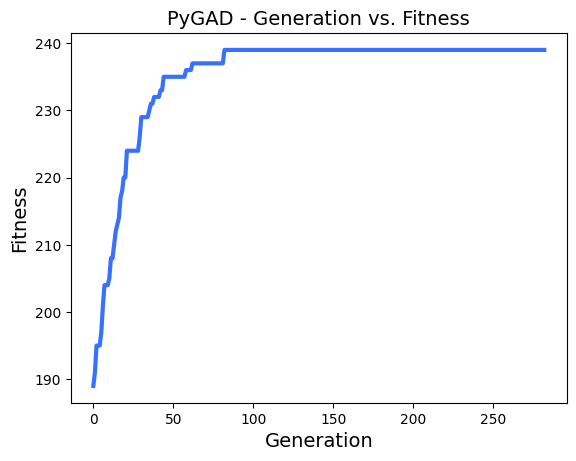

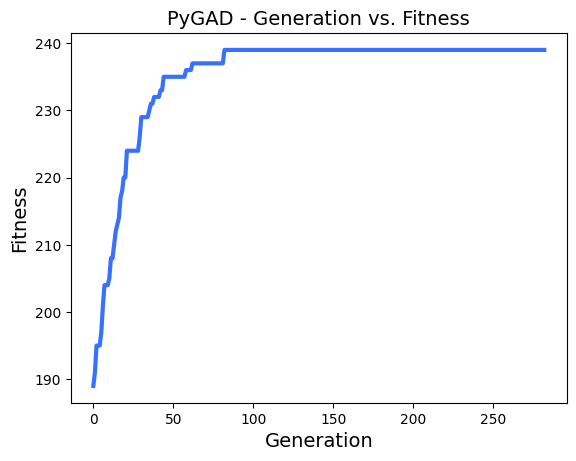

In [431]:
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution: {solution}".format(solution=solution))
print("Fitness value of the best solution (solved=243) = {solution_fitness}".format(solution_fitness=solution_fitness))

#liczba generacji algorytmu
print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))

print("Time passed: {time_passed}".format(time_passed=time_passed) + "\n")

print("Best solution found is:")
for i in fill_in(solution):
    print(i)
print("")
print("Correct solution is:")
for i in solved_sudoku:
    print(i)

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()